In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import namedtuple
from collections import defaultdict

from sklearn import metrics
from sklearn.metrics import auc, roc_curve, mean_squared_error

from surprise import Dataset
from surprise import Reader
from surprise import NMF
from surprise import SVD
from surprise import accuracy
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold



# 3. MovieLens dataset

In [2]:
rating_data = pd.read_csv('ml-latest-small/ratings.csv')
print(rating_data)

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
5            1       70     3.0   964982400
6            1      101     5.0   964980868
7            1      110     4.0   964982176
8            1      151     5.0   964984041
9            1      157     5.0   964984100
10           1      163     5.0   964983650
11           1      216     5.0   964981208
12           1      223     3.0   964980985
13           1      231     5.0   964981179
14           1      235     4.0   964980908
15           1      260     5.0   964981680
16           1      296     3.0   964982967
17           1      316     3.0   964982310
18           1      333     5.0   964981179
19           1      349     4.0   964982563
20           1      356     4.0   964980962
21           1      362     5.0 

In [3]:
users = rating_data['userId'].values
movies = rating_data['movieId'].values
ratings = rating_data['rating'].values
movie_set = set(movies)
user_set = set(users)

movieId_map_col = {} # key is the movieId, value is column index
def create_R(users, movies, ratings):
    user_num = len(user_set)
    movie_num = len(movie_set)

    for i in range(movie_num):
        movieId_map_col[list(movie_set)[i]] = i
        
    matrix_R = np.zeros((user_num, movie_num),dtype = float)
    for i in range(len(users)):
        matrix_R[users[i]-1][movieId_map_col[movies[i]]] = ratings[i]
    return matrix_R

matrix_R = create_R(users, movies, ratings)
print(matrix_R.shape)

(610, 9724)


# Question 1 

In [4]:
total_ratings = len(set(movies)) * len(set(users))
avaliable_ratings = len(ratings)
sparsity = avaliable_ratings / total_ratings
print("The Sparsicity of the Dataset:")
print(sparsity)

The Sparsicity of the Dataset:
0.016999683055613623


# Question 2


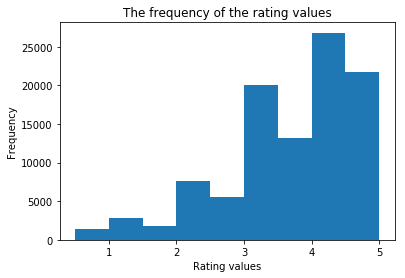

In [5]:
plt.hist(ratings, bins = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], align='mid')
plt.title("The frequency of the rating values")
plt.ylabel("Frequency")
plt.xlabel("Rating values")
plt.show()

# Question 3

Text(0.5,0,'Movie index')

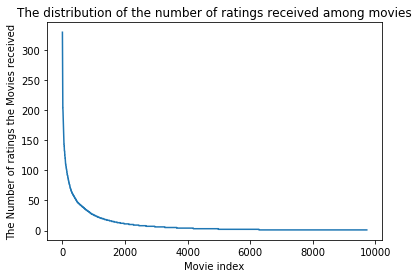

In [6]:
unique, counts = np.unique(movies, return_counts = True)
movie_count_dict = {}
for i in range(len(unique)):
    movie_count_dict[unique[i]] = counts[i]

movie_count_dict = sorted(movie_count_dict.items(), key = lambda item : item[1], reverse = True)  
# for movie_tuple in movie_count_dict:
#     plt.plt(movie_tuple[0])
plt.plot(range(len(movie_count_dict)), [movie_tuple[1] for movie_tuple in movie_count_dict])
plt.title('The distribution of the number of ratings received among movies')
plt.ylabel('The Number of ratings the Movies received')
plt.xlabel('Movie index')

#plt.show()

# Question 4

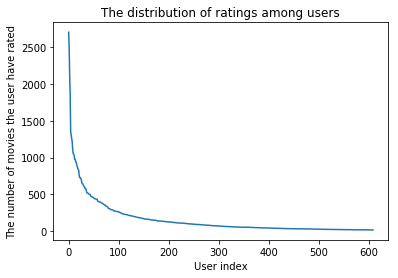

In [7]:
unique, counts = np.unique(users, return_counts = True)
users_count_dict = {}
for i in range(len(unique)):
    users_count_dict[unique[i]] = counts[i]

users_count_dict = sorted(users_count_dict.items(), key = lambda item : item[1], reverse = True)  
plt.plot(range(len(users_count_dict)), [users_tuple[1] for users_tuple in users_count_dict])
plt.title('The distribution of ratings among users')
plt.ylabel('The number of movies the user have rated')
plt.xlabel('User index')
plt.show()

# Question 6

max variance of the rating score: 5.062500
min variance of the rating score: 0.000000


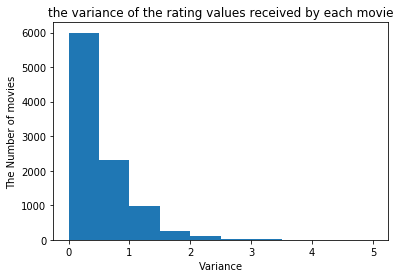

In [8]:
var_matrix = []

for i in range(matrix_R.shape[1]):
    valid = np.nonzero(matrix_R[:,i])  # i th col nonzero value
    var_matrix.append(np.var(matrix_R[valid,i]))

print("max variance of the rating score: %f" % max(var_matrix))
print("min variance of the rating score: %f" % min(var_matrix))

plt.hist(var_matrix, bins = [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5], align='mid')

plt.title("the variance of the rating values received by each movie")
plt.ylabel("The Number of movies")
plt.xlabel("Variance")

plt.show()

# 4. Neighborhood-based collaborative filtering

# Question 10&11

In [9]:
file_path = './ml-latest-small/ratings.csv'

reader = Reader(line_format='user item rating', sep=',', rating_scale=(0.5, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

In [42]:
sim_options = {'name': 'pearson', 'user_based': True}
k = range(2, 102, 2)
rmse = []
mae = []


for i in k:
    result = cross_validate(KNNWithMeans(k=i, sim_options=sim_options), data, measures=['rmse', 'mae'], cv=10, verbose=False)
    rmse.append(np.mean(result['test_rmse']))
    mae.append(np.mean(result['test_mae']))
    print('\nk = %d\n' %i) 
    print('-' * 80)

with open('Q10_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)
with open('Q10_mae_data', 'wb') as fp:
    pickle.dump(mae, fp)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

k = 2

--------------------------------------------------------------------------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing simila

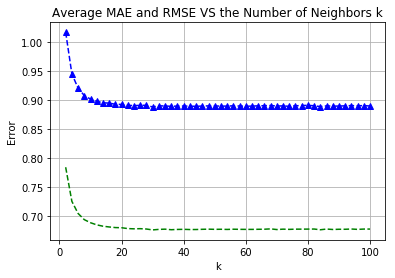

0.8883494222102204
0.6766606626818203
30
30


In [12]:
with open('Q10_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
with open('Q10_mae_data', 'rb') as fp:
    mae = pickle.load(fp)

fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^', k, mae, 'g--')
ax.set(xlabel='k', ylabel='Error',
       title='Average MAE and RMSE VS the Number of Neighbors k')
fig.savefig("Average MAE and RMSE VS the Number of Neighbors k.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
min_mae=min(mae)
print(min_rmse)
print(min_mae)
print(k[rmse.index(min_rmse)])
print(k[mae.index(min_mae)])

In [11]:
kf = KFold(n_splits=10)
k = range(2, 102, 2)

rates = {} #{movieId:[ratings]}

for row in data.raw_ratings: #row: (userId, movieId, rating, Timestamp)
    #print(row)
    if row[1] not in rates:
        rates[row[1]] = []
    rates[row[1]].append(row[2])

var = {}
for key in rates:
    var[key] = np.var(rates[key])

# Question 12


In [ ]:
pop_movie = [x for x in rates if len(rates[x]) > 2] #x: movieId (the key of rates)
rmse = []

for i in k:
    algo = KNNWithMeans(k=i, sim_options=sim_options)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in pop_movie] #x[1] is movieId
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)

with open('Q12_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

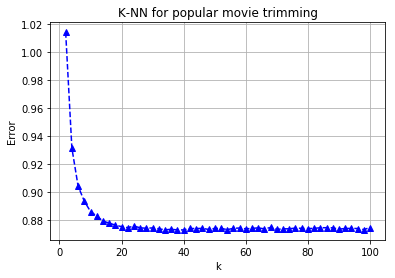

0.8727159569493651
40


In [15]:
with open('Q12_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)

fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='K-NN for popular movie trimming')
fig.savefig("K-NN for popular movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 13

In [ ]:
unpop_movie = [x for x in rates if len(rates[x]) <= 2]
rmse = []

for i in k:
    algo = KNNWithMeans(k=i, sim_options=sim_options)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in unpop_movie]
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)  

with open('Q13_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

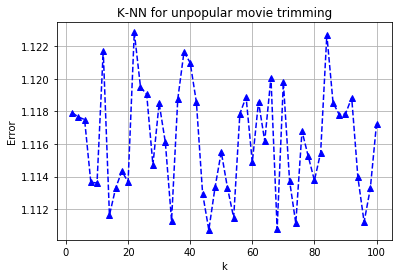

1.1107301969863053
46


In [16]:
with open('Q13_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)


fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='K-NN for unpopular movie trimming')
fig.savefig("K-NN for unpopular movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 14

In [ ]:
highvar_movie = [x for x in rates if len(rates[x]) >= 5 and var[x] >= 2]
rmse = []

for i in k:
    algo = KNNWithMeans(k=i, sim_options=sim_options)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in highvar_movie]
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)  

with open('Q14_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)
    

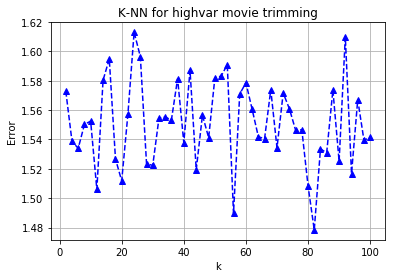

1.4783915768909652
82


In [19]:
with open('Q14_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)

fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='K-NN for highvar movie trimming')
fig.savefig("K-NN for highvar movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 15

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.


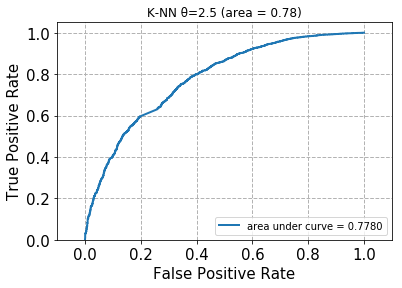

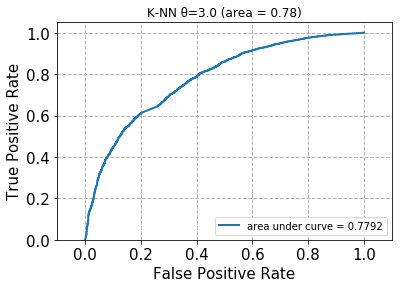

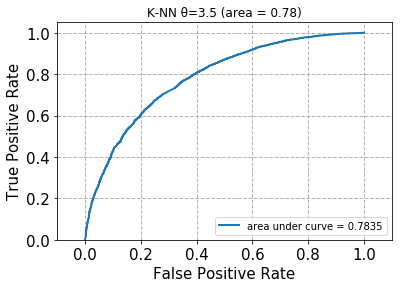

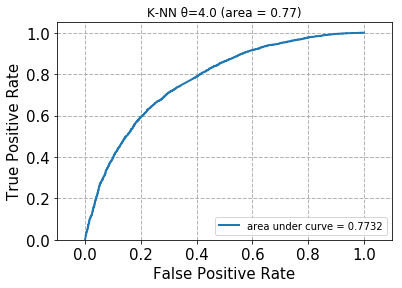

In [34]:
def plot_roc(fpr, tpr, name):
    fig, ax = plt.subplots()
    roc_auc = metrics.auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)
    ax.grid(color='0.7', linestyle='--', linewidth=1)
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    ax.set_title(name)
    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)


k_best = 30
threshold = [2.5, 3, 3.5, 4]

def threshold_plot(algo):
    for theta in threshold:

        df = pd.read_csv('./ml-latest-small/ratings.csv')

        reader = Reader(rating_scale=(0.5, 5))
        data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

        trainset, testset = train_test_split(data, test_size=.1)

        algo.fit(trainset)
        predictions = algo.test(testset) #predictions: (uid, iid, r_ui, est, details)

        trues = [0 if getattr(row, 'r_ui') < theta else 1 for row in predictions]
        scores = [getattr(row, 'est') for row in predictions]
        fpr, tpr, thresholds = metrics.roc_curve(trues, scores)
        roc_auc = metrics.auc(fpr, tpr)

        name = 'K-NN θ=%.1f (area = %0.2f)' % (theta, roc_auc)
        plot_roc(fpr,tpr,name)

        
algo = KNNWithMeans(k=k_best, sim_options=sim_options)
threshold_plot(algo)

# 5. Model-based collaborative filtering

# Question 17

In [50]:
k = range(2, 52, 2)
rmse = []
mae = []

for i in k:
    result = cross_validate(NMF(n_factors=i, biased=False), data, measures=['rmse', 'mae'], cv=10, verbose=False)
    rmse.append(np.mean(result['test_rmse']))
    mae.append(np.mean(result['test_mae']))
    print('\nk = %d\n' %i) 
    print('-' * 80)

with open('Q17_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)
with open('Q17_mae_data', 'wb') as fp:
    pickle.dump(mae, fp)


k = 2

--------------------------------------------------------------------------------

k = 4

--------------------------------------------------------------------------------

k = 6

--------------------------------------------------------------------------------

k = 8

--------------------------------------------------------------------------------

k = 10

--------------------------------------------------------------------------------

k = 12

--------------------------------------------------------------------------------

k = 14

--------------------------------------------------------------------------------

k = 16

--------------------------------------------------------------------------------

k = 18

--------------------------------------------------------------------------------

k = 20

--------------------------------------------------------------------------------

k = 22

--------------------------------------------------------------------------------

k = 24

-----

# Question 18

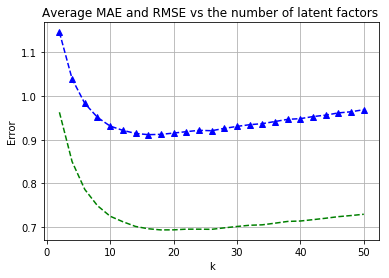

0.9116110536589176
0.6938911607955649
16
18


In [51]:
with open('Q17_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
with open('Q17_mae_data', 'rb') as fp:
    mae = pickle.load(fp)

fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^', k, mae, 'g--')
ax.set(xlabel='k', ylabel='Error',
       title='Average MAE and RMSE vs the number of latent factors ')
fig.savefig("Q17 Average MAE and RMSE vs the number of latent factors.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
min_mae=min(mae)
print(min_rmse)
print(min_mae)
print(k[rmse.index(min_rmse)])
print(k[mae.index(min_mae)])

# Question 19

In [55]:
kf = KFold(n_splits=10)

rmse = []

for i in k:
    algo = NMF(n_factors=i, biased=False)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in pop_movie] #x[1] is movieId
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)

with open('Q19_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

RMSE: 1.1337
RMSE: 1.1511
RMSE: 1.1459
RMSE: 1.1365
RMSE: 1.1469
RMSE: 1.1289
RMSE: 1.1492
RMSE: 1.1459
RMSE: 1.1390
RMSE: 1.1318

k = 2, Average RMSE = 1.1409

--------------------------------------------------------------------------------
RMSE: 1.0218
RMSE: 1.0420
RMSE: 1.0184
RMSE: 1.0244
RMSE: 1.0344
RMSE: 1.0136
RMSE: 1.0227
RMSE: 1.0172
RMSE: 1.0333
RMSE: 1.0147

k = 4, Average RMSE = 1.0242

--------------------------------------------------------------------------------
RMSE: 0.9668
RMSE: 0.9662
RMSE: 0.9703
RMSE: 0.9624
RMSE: 0.9759
RMSE: 0.9616
RMSE: 0.9572
RMSE: 0.9706
RMSE: 0.9582
RMSE: 0.9663

k = 6, Average RMSE = 0.9656

--------------------------------------------------------------------------------
RMSE: 0.9286
RMSE: 0.9324
RMSE: 0.9279
RMSE: 0.9190
RMSE: 0.9321
RMSE: 0.9405
RMSE: 0.9277
RMSE: 0.9354
RMSE: 0.9288
RMSE: 0.9338

k = 8, Average RMSE = 0.9306

--------------------------------------------------------------------------------
RMSE: 0.9017
RMSE: 0.9033
RMSE: 

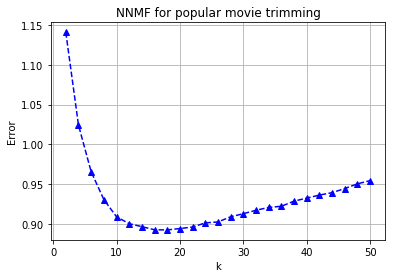

0.8924509942393563
18


In [107]:
with open('Q19_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
k = range(2, 52, 2)
fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='NNMF for popular movie trimming')
fig.savefig("Q19 NNMF for popular movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 20

In [63]:
rmse = []

for i in k:
    algo = NMF(n_factors=i, biased=False)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in unpop_movie] #x[1] is movieId
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)
           
with open('Q20_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

RMSE: 1.2793
RMSE: 1.2100
RMSE: 1.2798
RMSE: 1.1809
RMSE: 1.2499
RMSE: 1.2426
RMSE: 1.2421
RMSE: 1.1917
RMSE: 1.2462
RMSE: 1.2555

k = 2, Average RMSE = 1.2378

--------------------------------------------------------------------------------
RMSE: 1.2073
RMSE: 1.2285
RMSE: 1.2055
RMSE: 1.2385
RMSE: 1.2434
RMSE: 1.1837
RMSE: 1.1983
RMSE: 1.2394
RMSE: 1.2387
RMSE: 1.2243

k = 4, Average RMSE = 1.2208

--------------------------------------------------------------------------------
RMSE: 1.2440
RMSE: 1.2175
RMSE: 1.2683
RMSE: 1.1921
RMSE: 1.1874
RMSE: 1.2310
RMSE: 1.1740
RMSE: 1.1274
RMSE: 1.2109
RMSE: 1.2801

k = 6, Average RMSE = 1.2133

--------------------------------------------------------------------------------
RMSE: 1.2232
RMSE: 1.1800
RMSE: 1.2522
RMSE: 1.1714
RMSE: 1.2185
RMSE: 1.1805
RMSE: 1.2388
RMSE: 1.2043
RMSE: 1.2000
RMSE: 1.2497

k = 8, Average RMSE = 1.2119

--------------------------------------------------------------------------------
RMSE: 1.2100
RMSE: 1.1702
RMSE: 

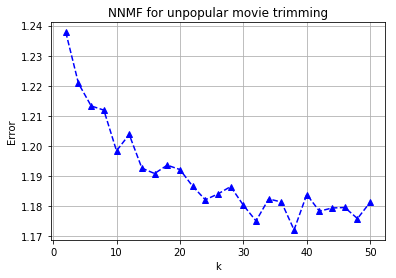

1.171972403885604
38


In [108]:
with open('Q20_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
    
fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='NNMF for unpopular movie trimming')
fig.savefig("Q20 NNMF for unpopular movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 21

In [65]:
rmse = []
for i in k:
    algo = NMF(n_factors=i, biased=False)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in highvar_movie] #x[1] is movieId
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80) 

with open('Q21_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

RMSE: 1.5669
RMSE: 1.6245
RMSE: 2.1494
RMSE: 1.7478
RMSE: 1.5259
RMSE: 1.5333
RMSE: 1.9687
RMSE: 1.6930
RMSE: 1.6098
RMSE: 1.8425

k = 2, Average RMSE = 1.7262

--------------------------------------------------------------------------------
RMSE: 1.4515
RMSE: 1.7477
RMSE: 1.7797
RMSE: 1.7125
RMSE: 1.7983
RMSE: 1.7925
RMSE: 1.7498
RMSE: 1.2269
RMSE: 1.5761
RMSE: 2.1393

k = 4, Average RMSE = 1.6974

--------------------------------------------------------------------------------
RMSE: 1.9198
RMSE: 1.3329
RMSE: 1.7825
RMSE: 1.6176
RMSE: 1.7356
RMSE: 1.7432
RMSE: 1.6999
RMSE: 1.7239
RMSE: 1.5901
RMSE: 1.6509

k = 6, Average RMSE = 1.6796

--------------------------------------------------------------------------------
RMSE: 1.7313
RMSE: 2.0085
RMSE: 1.8733
RMSE: 1.4197
RMSE: 1.4449
RMSE: 1.6794
RMSE: 1.8103
RMSE: 1.4806
RMSE: 1.8861
RMSE: 1.7146

k = 8, Average RMSE = 1.7049

--------------------------------------------------------------------------------
RMSE: 1.9961
RMSE: 1.4165
RMSE: 

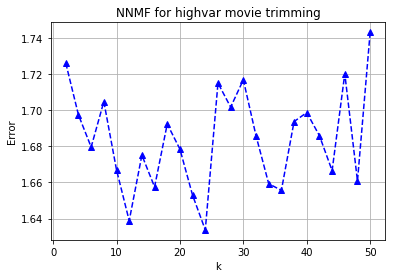

1.6336939995767152
24


In [110]:
with open('Q21_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
    
fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='NNMF for highvar movie trimming')
fig.savefig("Q21 NNMF for highvar movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 22

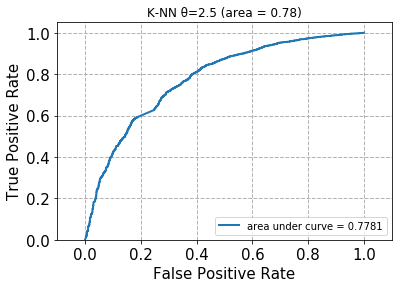

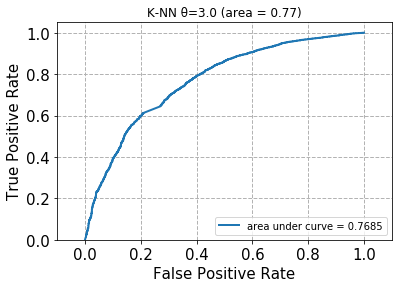

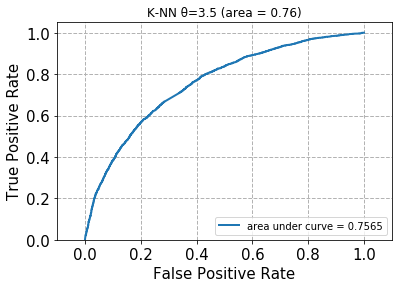

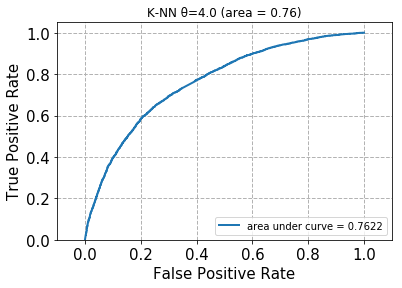

In [74]:
n_factors_best = 18
algo = NMF(n_factors=n_factors_best, biased=False)
threshold_plot(algo)

# Question 23

In [166]:
trainset = data.build_full_trainset()
model = NMF(n_factors=20, n_epochs=20, biased=False)
model.fit(trainset)
U = model.pu
V = model.qi
# print(U.shape)
# print(V.shape)

all_movies = pd.read_csv('ml-latest-small/movies.csv') 
all_moviesId = all_movies['movieId'] #unique, no duplicates
all_moviesId_map_index = {} #the mapping in movies.csv: key is actual movie id, value is index id(0,1,2...)

for i in range(len(all_moviesId)):
    all_moviesId_map_index[list(all_moviesId)[i]] = i

columns20 = []
for i in range(20): #column i of V
    column = V[:,i]
    sorted_column = -np.sort(-column) #desc
    #print(sorted_column)
    movie_ids = [0]*10 #store top 10 movie index ids in column j
    movie_genres = []
    for j in range(10):
        movie_ids[j] = list(column).index(sorted_column[j]) 
        for m_id, index in movieId_map_col.items(): #get key(movie_id) from value(index_id)
            if index == movie_ids[j]:
                actual_movie_id = m_id
                mapped_id = all_moviesId_map_index[actual_movie_id]
        movie_genres.append(all_movies['genres'][mapped_id])
    columns20.append(movie_genres)
    
for column_i in columns20:
    for k in range(10):
        print(column_i[k])
    print('\n')

Crime|Drama|Thriller
Action|Fantasy|Mystery
Action|Adventure|Sci-Fi|Thriller
Action|Crime|Thriller
Musical|Romance|War
Comedy
Comedy|Romance
Action|Adventure|Sci-Fi
Crime|Drama
Drama|Musical


Comedy
Comedy
Comedy
Adventure|Animation|Children|Comedy|Fantasy
Comedy|Drama|Romance
Comedy|Crime
Action|Crime|Drama
Drama
Comedy
Crime|Drama|Thriller


Drama|Horror|Mystery|Thriller
Comedy|Crime
Adventure|Animation|Children|Drama
Drama
Drama|Mystery
Drama|Romance
Comedy|Romance
Action|Thriller
Comedy|Drama
Action|Adventure


Comedy|Drama
Thriller
Documentary
Animation|Children|Fantasy
Crime|Thriller|War
Drama|Romance
Crime|Drama
Drama
Comedy|Musical|Romance
Comedy|Romance


Comedy|Sci-Fi
Drama
Action|Sci-Fi
Comedy|Musical|Western
Action|Crime|Drama
Animation|Crime|Drama
Comedy|Crime|Mystery|Thriller
Crime|Drama|Romance|Thriller
Drama
Comedy|Drama


Action|Crime|Drama
Comedy
Action|Adventure|Fantasy
War
Comedy|Drama|Musical|Romance
Adventure|Comedy
Drama|Western
Crime|Drama|Mystery|Thriller
Come

# Question 24

In [52]:
k = range(2, 52, 2)
rmse = []
mae = []

reader = Reader(line_format='user item rating', sep=',', rating_scale=(0.5, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)

for i in k:
    result = cross_validate(SVD(n_factors=i), data, measures=['rmse', 'mae'], cv=10, verbose=False)
    rmse.append(np.mean(result['test_rmse']))
    mae.append(np.mean(result['test_mae']))
    print('\nk = %d\n' %i) 
#     print('-' * 80)

with open('Q24_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)
with open('Q24_mae_data', 'wb') as fp:
    pickle.dump(mae, fp)


k = 2

--------------------------------------------------------------------------------

k = 4

--------------------------------------------------------------------------------

k = 6

--------------------------------------------------------------------------------

k = 8

--------------------------------------------------------------------------------

k = 10

--------------------------------------------------------------------------------

k = 12

--------------------------------------------------------------------------------

k = 14

--------------------------------------------------------------------------------

k = 16

--------------------------------------------------------------------------------

k = 18

--------------------------------------------------------------------------------

k = 20

--------------------------------------------------------------------------------

k = 22

--------------------------------------------------------------------------------

k = 24

-----

# Qustion 25

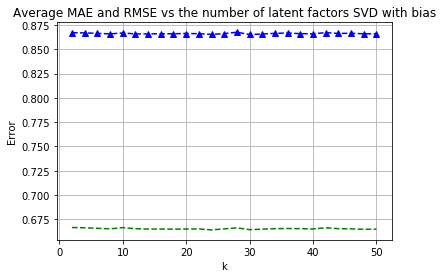

0.8651992328857963
0.6640173825235032
30
24


In [57]:
with open('Q24_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
with open('Q24_mae_data', 'rb') as fp:
    mae = pickle.load(fp)

fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^', k, mae, 'g--')
ax.set(xlabel='k', ylabel='Error',
       title='Average MAE and RMSE vs the number of latent factors SVD with bias')
fig.savefig("Q24 Average MAE and RMSE vs the number of latent factors SVD with bias.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
min_mae=min(mae)
print(min_rmse)
print(min_mae)
print(k[rmse.index(min_rmse)])
print(k[mae.index(min_mae)])

# Question 26

In [68]:
# Design a MF with bias collaborative filter 
# to predict the ratings of the movies in the popular movie 
kf = KFold(n_splits=10)
k = range(2, 52, 2)
rmse = []

for i in k:
    algo = SVD(n_factors=i)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in pop_movie] #x[1] is movieId
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)

with open('Q26_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

RMSE: 0.8508
RMSE: 0.8589
RMSE: 0.8628
RMSE: 0.8663
RMSE: 0.8617
RMSE: 0.8505
RMSE: 0.8666
RMSE: 0.8737
RMSE: 0.8401
RMSE: 0.8684

k = 2, Average RMSE = 0.8600

--------------------------------------------------------------------------------
RMSE: 0.8591
RMSE: 0.8609
RMSE: 0.8581
RMSE: 0.8577
RMSE: 0.8630
RMSE: 0.8624
RMSE: 0.8589
RMSE: 0.8512
RMSE: 0.8653
RMSE: 0.8531

k = 4, Average RMSE = 0.8590

--------------------------------------------------------------------------------
RMSE: 0.8600
RMSE: 0.8501
RMSE: 0.8624
RMSE: 0.8647
RMSE: 0.8548
RMSE: 0.8651
RMSE: 0.8437
RMSE: 0.8607
RMSE: 0.8615
RMSE: 0.8621

k = 6, Average RMSE = 0.8585

--------------------------------------------------------------------------------
RMSE: 0.8424
RMSE: 0.8657
RMSE: 0.8650
RMSE: 0.8529
RMSE: 0.8613
RMSE: 0.8661
RMSE: 0.8541
RMSE: 0.8530
RMSE: 0.8687
RMSE: 0.8596

k = 8, Average RMSE = 0.8589

--------------------------------------------------------------------------------
RMSE: 0.8645
RMSE: 0.8482
RMSE: 

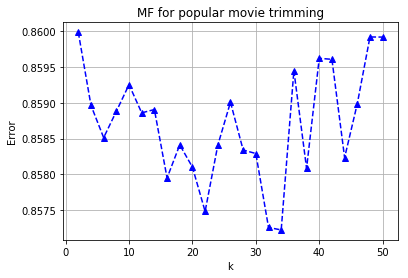

0.8572248479715763
34


In [111]:
with open('Q26_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
    
fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='MF for popular movie trimming')
fig.savefig("Q26 MF for popular movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 27

In [70]:
# Design a MF with bias collaborative filter 
# to predict the ratings of the movies in the popular movie 
kf = KFold(n_splits=10)
k = range(2, 52, 2)
rmse = []

for i in k:
    algo = SVD(n_factors=i)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in unpop_movie] #x[1] is movieId
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)

with open('Q27_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

RMSE: 0.9530
RMSE: 0.9662
RMSE: 0.9862
RMSE: 0.8845
RMSE: 1.0532
RMSE: 0.9859
RMSE: 0.9766
RMSE: 1.0225
RMSE: 1.0262
RMSE: 0.8965

k = 2, Average RMSE = 0.9751

--------------------------------------------------------------------------------
RMSE: 0.9771
RMSE: 0.9706
RMSE: 0.9433
RMSE: 0.9645
RMSE: 1.0471
RMSE: 0.9364
RMSE: 0.9378
RMSE: 0.9732
RMSE: 0.9613
RMSE: 1.0108

k = 4, Average RMSE = 0.9722

--------------------------------------------------------------------------------
RMSE: 1.0205
RMSE: 0.9205
RMSE: 0.9613
RMSE: 0.9522
RMSE: 0.9546
RMSE: 0.9936
RMSE: 0.9580
RMSE: 0.9873
RMSE: 1.0001
RMSE: 0.9945

k = 6, Average RMSE = 0.9743

--------------------------------------------------------------------------------
RMSE: 0.9261
RMSE: 0.9841
RMSE: 1.0200
RMSE: 0.9978
RMSE: 0.9884
RMSE: 0.9942
RMSE: 0.8977
RMSE: 0.9948
RMSE: 0.9669
RMSE: 0.9372

k = 8, Average RMSE = 0.9707

--------------------------------------------------------------------------------
RMSE: 0.9938
RMSE: 0.9989
RMSE: 

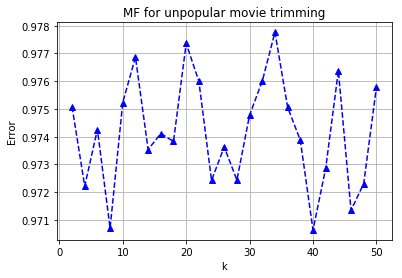

0.9706409654188611
40


In [113]:
with open('Q27_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
    
fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='MF for unpopular movie trimming')
fig.savefig("Q27 MF for unpopular movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 28

In [72]:
# Design a MF with bias collaborative filter 
# to predict the ratings of the movies in the popular movie 
kf = KFold(n_splits=10)
k = range(2, 52, 2)
rmse = []

for i in k:
    algo = SVD(n_factors=i)
    score = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        trimset = [x for x in testset if x[1] in highvar_movie] #x[1] is movieId
        predictions = algo.test(trimset)
        score.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(sum(score) / len(score))
    print('\nk = %d, Average RMSE = %.4f\n' % (i, sum(score) / len(score)))
    print('-' * 80)

with open('Q28_rmse_data', 'wb') as fp:
    pickle.dump(rmse, fp)

RMSE: 1.3254
RMSE: 1.3917
RMSE: 1.5451
RMSE: 1.2089
RMSE: 1.4235
RMSE: 1.7103
RMSE: 1.5323
RMSE: 1.6113
RMSE: 1.5150
RMSE: 1.7304

k = 2, Average RMSE = 1.4994

--------------------------------------------------------------------------------
RMSE: 1.3502
RMSE: 1.5532
RMSE: 1.5745
RMSE: 1.4012
RMSE: 1.5457
RMSE: 1.3484
RMSE: 1.4949
RMSE: 1.4930
RMSE: 1.4717
RMSE: 1.5981

k = 4, Average RMSE = 1.4831

--------------------------------------------------------------------------------
RMSE: 1.6616
RMSE: 1.3569
RMSE: 1.4432
RMSE: 1.5056
RMSE: 1.8612
RMSE: 1.6005
RMSE: 1.6434
RMSE: 1.4055
RMSE: 1.1386
RMSE: 1.3114

k = 6, Average RMSE = 1.4928

--------------------------------------------------------------------------------
RMSE: 1.2418
RMSE: 1.3374
RMSE: 1.3576
RMSE: 1.7289
RMSE: 1.7049
RMSE: 1.3247
RMSE: 1.2944
RMSE: 1.6128
RMSE: 1.5958
RMSE: 1.4810

k = 8, Average RMSE = 1.4679

--------------------------------------------------------------------------------
RMSE: 1.5051
RMSE: 1.4924
RMSE: 

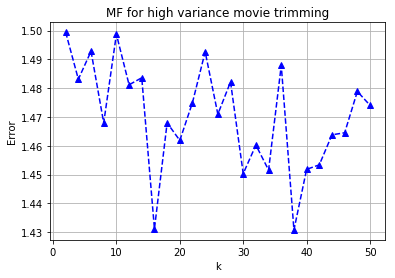

1.4307761395569103
38


In [112]:
with open('Q28_rmse_data', 'rb') as fp:
    rmse = pickle.load(fp)
    
fig, ax = plt.subplots()
ax.plot(k, rmse, 'b--^')
ax.set(xlabel='k', ylabel='Error',
       title='MF for high variance movie trimming')
fig.savefig("Q28 MF for high variance movie trimming.png")
ax.grid()
plt.show()
min_rmse=min(rmse)
print(min_rmse)
print(k[rmse.index(min_rmse)])

# Question 29

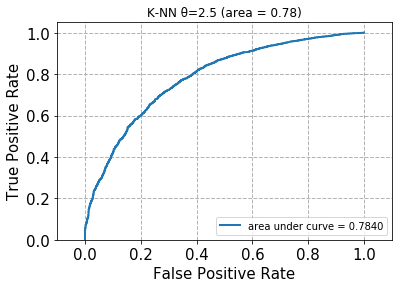

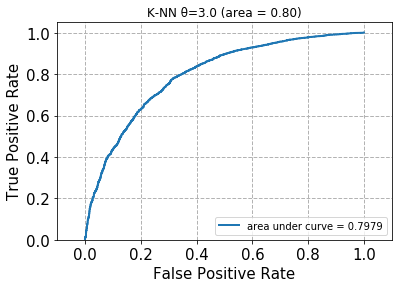

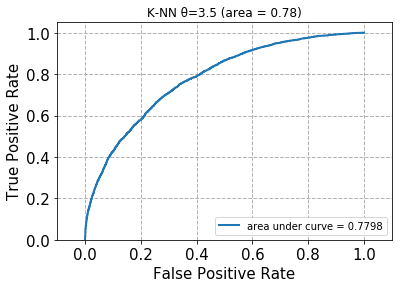

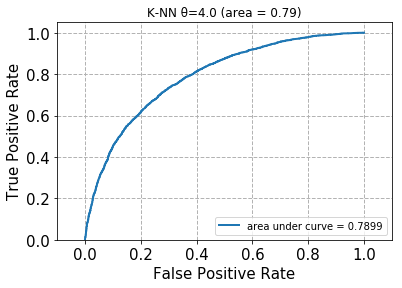

In [75]:
n_factors_best = 30
algo = SVD(n_factors=n_factors_best)
threshold_plot(algo)

# 6.Naive collaborative filtering

# Question 30

In [14]:
kf = KFold(n_splits=10) # kf has been generated before

rmse_naive = []
user_num = len(set(users))
available_ratings = len(ratings)
index = 0;
naive_rate = []
for i in range(user_num):
    score_naive = [];
    while (users[index]==i+1):
        score_naive.append(ratings[index])
        index += 1
        if (index == available_ratings):
            break
   
    naive_rate.append(np.mean(score_naive))


In [15]:
rmse_naive = []
kf = KFold(n_splits=10) # kf has been generated before
for train_index, test_index in kf.split(data):
    y_true = []
    y_false = []
    for i in range(len(test_index)):
        y_true.append(test_index[i][2])
        y_false.append(naive_rate[(int(test_index[i][0]) - 1)])
    rmse_naive.append(np.sqrt(metrics.mean_squared_error(y_true,y_false)))
mean_rmse_naive = np.mean(rmse_naive)  
print(mean_rmse_naive)

0.9347091902519573


# Question 31

In [18]:
rates = {} #{movieId:[ratings]}
for row in data.raw_ratings: #row: (userId, movieId, rating, Timestamp)
    if row[1] not in rates:
        rates[row[1]] = []
    rates[row[1]].append(row[2])
var = {}
for key in rates:
    var[key] = np.var(rates[key])

In [19]:
pop_movie = [x for x in rates if len(rates[x]) > 2]
rmse_pop_naive = []
for train_index, test_index in kf.split(data):
    y_true = []
    y_false = []
    for i in range(len(test_index)):
        if (test_index[i][1] in pop_movie):
            y_true.append(test_index[i][2])
            y_false.append(naive_rate[(int(test_index[i][0]) - 1)])
    rmse_pop_naive.append(np.sqrt(metrics.mean_squared_error(y_true,y_false)))
    
mean_rmse_pop_naive = np.mean(rmse_pop_naive)  
print(mean_rmse_pop_naive)

0.9322887549329414


# Question 32

In [20]:
unpop_movie = [x for x in rates if len(rates[x]) <= 2]

rmse_unpop_naive = []
for train_index, test_index in kf.split(data):
    y_true = []
    y_false = []
    for i in range(len(test_index)):
        if (test_index[i][1] in unpop_movie):
            y_true.append(test_index[i][2])
            y_false.append(naive_rate[(int(test_index[i][0]) - 1)])
    rmse_unpop_naive.append(np.sqrt(metrics.mean_squared_error(y_true,y_false)))
    
mean_rmse_unpop_naive = np.mean(rmse_unpop_naive)  
print(mean_rmse_unpop_naive)

0.9707498840910211


# Question 33

In [21]:
highvar_movie = [x for x in rates if len(rates[x]) >= 5 and var[x] >= 2]

rmse_highvar_naive = []
for train_index, test_index in kf.split(data):
    y_true = []
    y_false = []
    for i in range(len(test_index)):
        if (test_index[i][1] in highvar_movie):
            y_true.append(test_index[i][2])
            y_false.append(naive_rate[(int(test_index[i][0]) - 1)])
    rmse_highvar_naive.append(np.sqrt(metrics.mean_squared_error(y_true,y_false)))
    
mean_rmse_highvar_naive = np.mean(rmse_highvar_naive)  
print(mean_rmse_highvar_naive)

1.4806571963461648


# Question 34

In [129]:
def plot_roc_t3(fpr_KNN, tpr_KNN, fpr_NMF, tpr_NMF, fpr_SVD, tpr_SVD, name):
    fig, ax = plt.subplots()
    roc_auc_KNN = metrics.auc(fpr_KNN,tpr_KNN)
    roc_auc_NMF = metrics.auc(fpr_NMF,tpr_NMF)
    roc_auc_SVD = metrics.auc(fpr_SVD,tpr_SVD)

    ax.plot(fpr_KNN, tpr_KNN, lw=2, label= 'KNN: area under curve = %0.4f' % roc_auc_KNN)
    ax.plot(fpr_NMF, tpr_NMF, lw=2, label= 'NMF: area under curve = %0.4f' % roc_auc_NMF)
    ax.plot(fpr_SVD, tpr_SVD, lw=2, label= 'SVD: area under curve = %0.4f' % roc_auc_SVD)
    
    ax.grid(color='0.7', linestyle='--', linewidth=1)
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)
    ax.set_title(name)
    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

Computing the pearson similarity matrix...
Done computing similarity matrix.


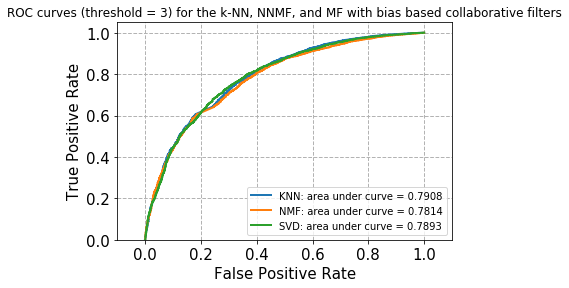

In [130]:
threshold_compare = 3
k_best_KNN = 30
sim_options = {'name': 'pearson', 'user_based': True}
k_best_NMF = 18
k_best_SVD = 30

algo_KNN = KNNWithMeans(k=k_best_KNN, sim_options=sim_options)
algo_NMF = NMF(n_factors=k_best_NMF, biased=False)
algo_SVD = SVD(n_factors=k_best_SVD)

def ROC_helper(algo):
    df = pd.read_csv('./ml-latest-small/ratings.csv')
    reader = Reader(rating_scale=(0.5, 5))
    data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
    trainset, testset = train_test_split(data, test_size=.1)
    
    algo.fit(trainset)
    predictions = algo.test(testset)
    
    trues = [0 if getattr(row, 'r_ui') < threshold_compare else 1 for row in predictions]
    scores = [getattr(row, 'est') for row in predictions]
    fpr, tpr, thresholds = metrics.roc_curve(trues, scores)
    return fpr, tpr
fpr_KNN, tpr_KNN = ROC_helper(algo_KNN)
fpr_NMF, tpr_NMF = ROC_helper(algo_NMF)
fpr_SVD, tpr_SVD = ROC_helper(algo_SVD)
   
plot_roc_t3(fpr_KNN, tpr_KNN, fpr_NMF, tpr_NMF, fpr_SVD, tpr_SVD,"ROC curves (threshold = 3) for the k-NN, NNMF, and MF with bias based collaborative filters")


# Question 35

In [156]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

# Question 36

In [157]:
threshold_compare = 3
def algorithm_precision_recall(algo):
    avg_precision = []
    avg_recall = []
    t_range = range(1, 26, 1)
    for t in t_range:
        reader = Reader(line_format='user item rating', sep=',', rating_scale=(0.5, 5), skip_lines=1)
        data = Dataset.load_from_file(file_path, reader=reader)
        kf = KFold(n_splits=10)
        
        for trainset, testset in kf.split(data):
            algo.fit(trainset)
            predictions = algo.test(testset)
            precisions, recalls = precision_recall_at_k(predictions, k=t, threshold=threshold_compare)

        avg_precision.append(np.array(list(precisions.values())).mean())
        avg_recall.append(np.array(list(recalls.values())).mean())
        
    return avg_precision, avg_recall

In [172]:
k_best_KNN = 30
sim_options = {'name': 'pearson', 'user_based': True}
algo_KNN = KNNWithMeans(k=k_best_KNN, sim_options=sim_options)

p_knn, r_knn = algorithm_precision_recall(algo_KNN)
with open('Q36_precision_data', 'wb') as fp:
    pickle.dump(p_knn, fp)
with open('Q36_recall_data', 'wb') as fp:
    pickle.dump(r_knn, fp)


Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

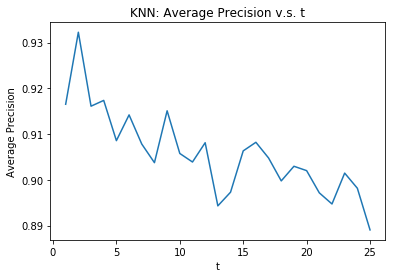

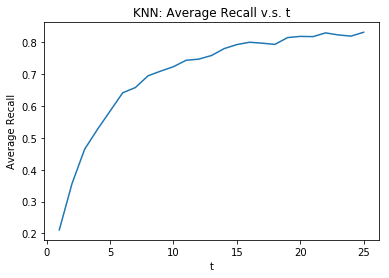

In [173]:
with open('Q36_precision_data', 'rb') as fp:
    p_knn = pickle.load(fp)
with open('Q36_recall_data', 'rb') as fp:
    r_knn = pickle.load(fp)
    
t_range = range(1, 26, 1)
plt.plot(t_range, p_knn)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('KNN: Average Precision v.s. t')
plt.show()

t_range = range(1, 26, 1)
plt.plot(t_range, r_knn)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('KNN: Average Recall v.s. t')
plt.show()

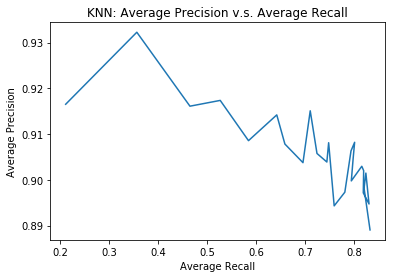

In [174]:
plt.plot(r_knn, p_knn)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('KNN: Average Precision v.s. Average Recall')
plt.show()

# Question 37

In [161]:
k_best_NMF = 18
algo_NMF = NMF(n_factors=k_best_NMF, biased=False)
p_nmf, r_nmf = algorithm_precision_recall(algo_NMF)

with open('Q37_precision_data', 'wb') as fp:
    pickle.dump(p_nmf, fp)
with open('Q37_recall_data', 'wb') as fp:
    pickle.dump(r_nmf, fp)

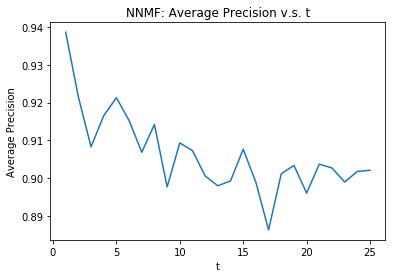

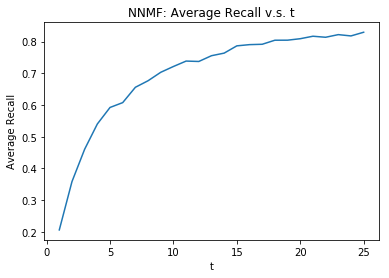

In [163]:
with open('Q37_precision_data', 'rb') as fp:
    p_nmf = pickle.load(fp)
with open('Q37_recall_data', 'rb') as fp:
    r_nmf = pickle.load(fp)
    
t_range = range(1, 26, 1)
plt.plot(t_range, p_nmf)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('NNMF: Average Precision v.s. t')
plt.show()

t_range = range(1, 26, 1)
plt.plot(t_range, r_nmf)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('NNMF: Average Recall v.s. t')
plt.show()

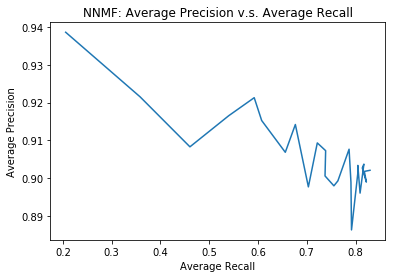

In [165]:
plt.plot(r_nmf, p_nmf)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('NNMF: Average Precision v.s. Average Recall')
plt.show()

# Question 38

In [167]:
k_best_SVD = 30
algo_SVD = SVD(n_factors=k_best_SVD)
p_svd, r_svd = algorithm_precision_recall(algo_SVD)
with open('Q38_precision_data', 'wb') as fp:
    pickle.dump(p_svd, fp)
with open('Q38_recall_data', 'wb') as fp:
    pickle.dump(r_svd, fp)

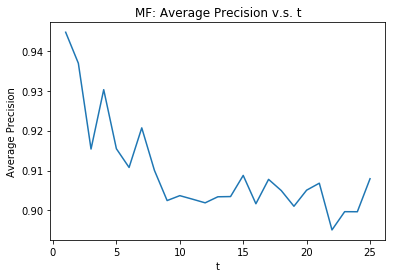

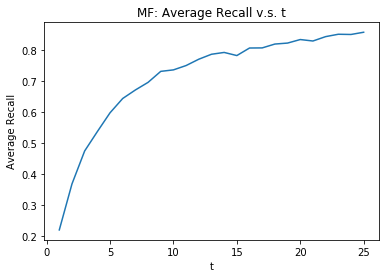

In [168]:
with open('Q38_precision_data', 'rb') as fp:
    p_svd = pickle.load(fp)
with open('Q38_recall_data', 'rb') as fp:
    r_svd = pickle.load(fp)
    
t_range = range(1, 26, 1)
plt.plot(t_range, p_svd)
plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('MF: Average Precision v.s. t')
plt.show()

plt.plot(t_range, r_svd)
plt.xlabel('t')
plt.ylabel('Average Recall')
plt.title('MF: Average Recall v.s. t')
plt.show()

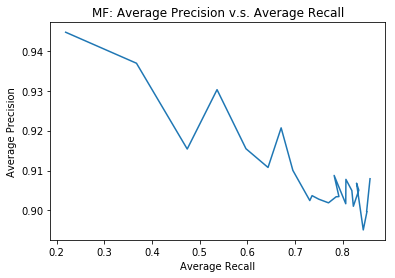

In [169]:
plt.plot(r_svd, p_svd)
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('MF: Average Precision v.s. Average Recall')
plt.show()

# Question 39

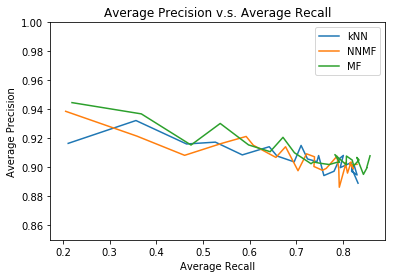

In [177]:
with open('Q36_precision_data', 'rb') as fp:
    p_knn = pickle.load(fp)
with open('Q36_recall_data', 'rb') as fp:
    r_knn = pickle.load(fp)
with open('Q37_precision_data', 'rb') as fp:
    p_nmf = pickle.load(fp)
with open('Q37_recall_data', 'rb') as fp:
    r_nmf = pickle.load(fp)
with open('Q38_precision_data', 'rb') as fp:
    p_svd = pickle.load(fp)
with open('Q38_recall_data', 'rb') as fp:
    r_svd = pickle.load(fp)
    
plt.plot(r_knn, p_knn, label = 'kNN')
plt.plot(r_nmf, p_nmf, label = 'NNMF')
plt.plot(r_svd, p_svd, label = 'MF')
plt.xlabel('Average Recall')
plt.ylabel('Average Precision')
plt.title('Average Precision v.s. Average Recall')
plt.ylim(0.85,1)
plt.legend()
plt.show()

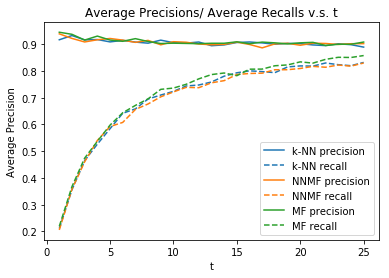

In [185]:
t_range = range(1, 26, 1)
plt.plot(t_range, p_knn, 'C0', label = 'k-NN precision')
plt.plot(t_range, r_knn, 'C0--', label = 'k-NN recall')
plt.plot(t_range, p_nmf, 'C1', label = 'NNMF precision')
plt.plot(t_range, r_nmf, 'C1--', label = 'NNMF recall')
plt.plot(t_range, p_svd, 'C2', label = 'MF precision')
plt.plot(t_range, r_svd, 'C2--', label = 'MF recall')

plt.xlabel('t')
plt.ylabel('Average Precision')
plt.title('Average Precisions/ Average Recalls v.s. t')
plt.legend()
plt.show()